# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data1 = data.copy()

# Encoding the Categorical Columns to Numerical

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LB = LabelEncoder()

In [7]:
data1['Month'] = LB.fit_transform(data['Month'])
data1['VisitorType'] = LB.fit_transform(data['VisitorType'])
data1['Weekend'] = LB.fit_transform(data['Weekend'])
data1['Revenue'] = LB.fit_transform(data['Revenue'])

In [8]:
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,QuantileTransformer,PowerTransformer,Normalizer

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold
import sklearn.metrics as metrics

# Standard Scalar

In [11]:
sc = StandardScaler()
sc_data = sc.fit_transform(data1)
sc_data = pd.DataFrame(sc_data,columns=data1.columns)

In [12]:
from sklearn.decomposition import PCA

In [13]:
dat_admin = sc_data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [14]:
pca = PCA()
principalComponents = pca.fit_transform(dat_admin)

In [15]:
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_cum

array([24.3, 36.3, 46.3, 54. , 61.2, 68.1, 74.9, 81.4, 87.5, 92.9, 95.9,
       98.4, 99.3, 99.9])

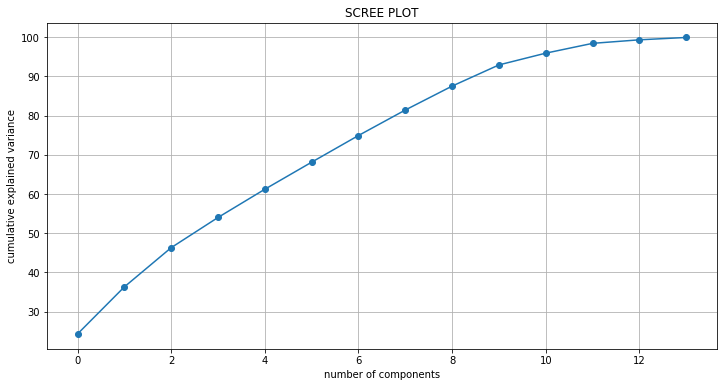

In [16]:
#SCREE PLOT
plt.figure(figsize=(12,6))
plt.plot(var_cum,'o-')
plt.title('SCREE PLOT')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [17]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(dat_admin)

In [18]:
principalDf = pd.DataFrame(data = principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'],
                           index=data.index)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.156230,3.608799,-1.902827,-0.846904,-0.895067,0.363079,0.900307,0.246944,0.337188,0.216427,-0.113593,-0.076899
1,-1.353205,-0.044756,-0.840909,-0.024726,0.222838,0.357489,0.337628,-0.669243,0.323581,-0.112154,0.190309,0.067810
2,-3.297239,3.522667,1.306028,-1.351472,-0.843836,-1.772477,0.494559,0.789955,-0.486070,-2.211785,-0.044439,-0.074981
3,-1.971260,1.087528,0.182843,-0.238658,-0.038622,0.335204,0.386962,-0.647857,0.077111,-0.789086,0.122249,0.030152
4,-0.990417,-0.267092,0.394423,0.295322,0.262010,0.538722,0.468342,-1.043099,0.333052,-0.432197,0.207691,0.061842


In [19]:
Catego = sc_data[['Month','VisitorType','Weekend']]

In [20]:
Final = pd.concat([principalDf,Catego],axis=1)

In [21]:
X = Final
Y = data1.Revenue

## Logistic Regression

In [22]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [23]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [24]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.50 ROC-AOC: 0.68


In [25]:
# Storing results in a dataframe
resultsDf = pd.DataFrame({'Scaling':['Standard'],'Model':['Logistic Regression'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718


## Decision Tree

In [26]:
DT = DecisionTreeClassifier()

In [27]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
GS.best_params_

{'max_depth': 2}

In [29]:
DT = DecisionTreeClassifier(max_depth=2)

###  K Fold Cross Validation

In [30]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [31]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    DT.fit(xtrain,ytrain)
    y_predict = DT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.87  F1: 0.33 ROC-AOC: 0.60


In [32]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Standard'],'Model':['Decision Tree'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803


## Random Forest

In [33]:
RT = RandomForestClassifier(random_state=0)

In [34]:
parameter ={'n_estimators':np.arange(1,10),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
GS.best_params_

{'max_depth': 4, 'n_estimators': 8}

In [36]:
RT = RandomForestClassifier(n_estimators=8,max_depth=4,random_state=0)

###  K Fold Cross Validation

In [37]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [38]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.37 ROC-AOC: 0.62


In [39]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Standard'],'Model':['Random Forest'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600


# MinMax Scalar

In [40]:
mm = MinMaxScaler()
mm_data = mm.fit_transform(data1)
mm_data = pd.DataFrame(mm_data,columns=data1.columns)

In [41]:
dat_admin = mm_data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [42]:
pca = PCA()
principalComponents = pca.fit_transform(dat_admin)

In [43]:
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_cum

array([ 32.1,  57.3,  70.1,  80.8,  86.8,  91.4,  95.3,  96.7,  97.9,
        98.7,  99.4,  99.8, 100.1, 100.1])

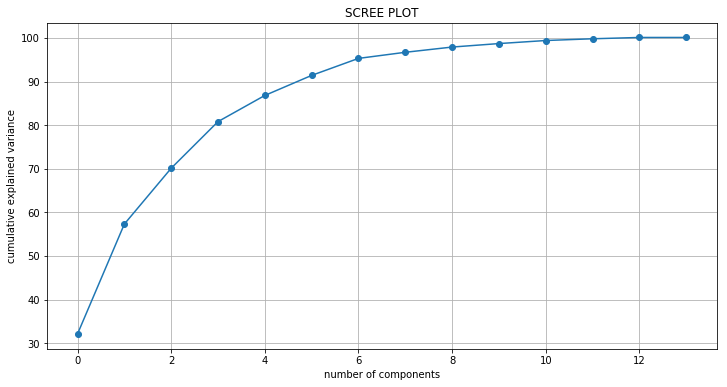

In [44]:
#SCREE PLOT
plt.figure(figsize=(12,6))
plt.plot(var_cum,'o-')
plt.title('SCREE PLOT')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [45]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(dat_admin)

In [46]:
principalDf = pd.DataFrame(data = principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'],
                           index=data.index)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.161691,-0.278578,-0.312273,-0.095459,-0.108299,0.040552,-0.076706,-0.060704,-0.029368,-0.006024
1,0.127404,-0.274689,-0.110999,-0.033214,0.022061,-0.139929,0.021772,0.238162,0.091030,0.024201
2,1.156906,0.744132,-0.224118,-0.105385,0.004767,0.110189,0.274126,-0.052155,-0.017941,-0.003889
3,0.448143,-0.131588,-0.032264,-0.084741,0.057079,-0.071718,0.126125,0.213806,0.084318,0.024588
4,0.031690,-0.255107,0.033817,-0.070128,0.130390,-0.083325,0.094200,0.019494,0.003738,0.000581


In [47]:
Catego = sc_data[['Month','VisitorType','Weekend']]

In [48]:
Final = pd.concat([principalDf,Catego],axis=1)

In [49]:
X = Final
Y = data1.Revenue

## Logistic Regression

In [50]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [51]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [52]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.85  F1: 0.05 ROC-AOC: 0.51


In [53]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['MinMax'],'Model':['Logistic Regression'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790


## Decision Tree

In [54]:
DT = DecisionTreeClassifier()

In [55]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
GS.best_params_

{'max_depth': 2}

In [57]:
DT = DecisionTreeClassifier(max_depth=2)

###  K Fold Cross Validation

In [58]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [59]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    DT.fit(xtrain,ytrain)
    y_predict = DT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.85  F1: 0.22 ROC-AOC: 0.56


In [60]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['MinMax'],'Model':['Decision Tree'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389


## Random Forest

In [61]:
RT = RandomForestClassifier(random_state=0)

In [62]:
parameter ={'n_estimators':np.arange(1,10),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
GS.best_params_

{'max_depth': 4, 'n_estimators': 9}

In [64]:
RT = RandomForestClassifier(n_estimators=9,max_depth=4,random_state=0)

###  K Fold Cross Validation

In [65]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [66]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.85  F1: 0.12 ROC-AOC: 0.53


In [67]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['MinMax'],'Model':['Random Forest'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452


   # MAXABS Scalar

In [68]:
ma = MaxAbsScaler()
ma_data = ma.fit_transform(data1)
ma_data = pd.DataFrame(ma_data,columns=data1.columns)

In [69]:
dat_admin = ma_data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [70]:
pca = PCA()
principalComponents = pca.fit_transform(dat_admin)

In [71]:
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_cum

array([ 35. ,  56.7,  69.4,  80.9,  86.4,  91.4,  94.7,  96.2,  97.5,
        98.4,  99.1,  99.6,  99.9, 100. ])

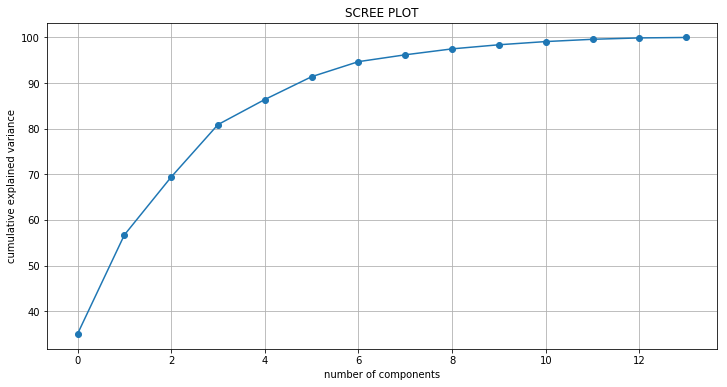

In [72]:
#SCREE PLOT
plt.figure(figsize=(12,6))
plt.plot(var_cum,'o-')
plt.title('SCREE PLOT')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [73]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(dat_admin)

In [74]:
principalDf = pd.DataFrame(data = principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
                           ,index=data.index)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.162737,-0.259425,-0.301894,-0.014360,-0.103788,0.027832,-0.072160,-0.061120,-0.029465,-0.005993,-0.001239
1,0.126388,-0.246584,-0.108848,-0.003717,0.047156,-0.135203,0.006313,0.238135,0.091018,0.024177,0.043115
2,1.164650,0.650119,-0.244348,-0.031776,-0.042037,0.076129,0.249501,-0.050778,-0.017773,-0.003947,-0.001251
3,0.446778,-0.119725,-0.056399,-0.071003,0.057658,-0.074222,0.106366,0.214359,0.084369,0.024533,0.043805
4,0.028779,-0.225566,0.006262,-0.074028,0.128973,-0.068706,0.084522,0.019981,0.003746,0.000530,-0.011989


In [75]:
Catego = sc_data[['Month','VisitorType','Weekend']]

In [76]:
Final = pd.concat([principalDf,Catego],axis=1)

In [77]:
X = Final
Y = data1.Revenue

## Logistic Regression

In [78]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [79]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [80]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.40 ROC-AOC: 0.63


In [81]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['MinAbs'],'Model':['Logistic Regression'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048


## Decision Tree

In [82]:
DT = DecisionTreeClassifier()

In [83]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
GS.best_params_

{'max_depth': 2}

In [85]:
DT = DecisionTreeClassifier(max_depth=2)

###  K Fold Cross Validation

In [86]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [87]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    DT.fit(xtrain,ytrain)
    y_predict = DT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.44 ROC-AOC: 0.65


In [88]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['MaxAbs'],'Model':['Decision Tree'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131


## Random Forest

In [89]:
RT = RandomForestClassifier(random_state=0)

In [90]:
parameter ={'n_estimators':np.arange(1,10),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
GS.best_params_

{'max_depth': 5, 'n_estimators': 1}

In [92]:
RT = RandomForestClassifier(n_estimators=1,max_depth=5,random_state=0)

###  K Fold Cross Validation

In [93]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [94]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.89  F1: 0.57 ROC-AOC: 0.73


In [95]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['MaxAbs'],'Model':['Random Forest'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319


# Robust Scalar

In [96]:
rs = RobustScaler()
rs_data = rs.fit_transform(data1)
rs_data = pd.DataFrame(rs_data,columns=data1.columns)

In [97]:
dat_admin = rs_data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [98]:
pca = PCA()
principalComponents = pca.fit_transform(dat_admin)

In [99]:
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_cum

array([ 98.2,  99.9, 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. ])

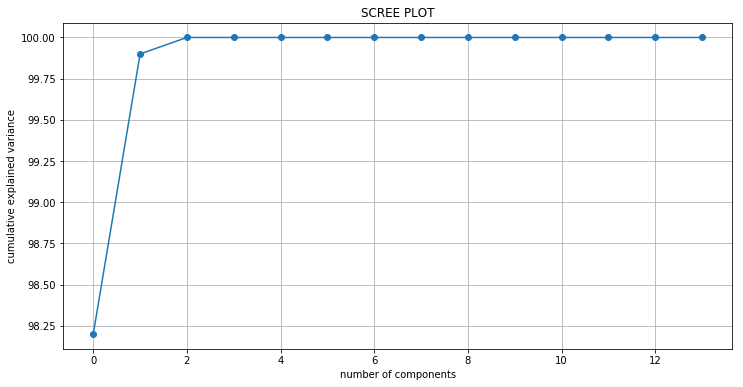

In [100]:
#SCREE PLOT
plt.figure(figsize=(12,6))
plt.plot(var_cum,'o-')
plt.title('SCREE PLOT')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [101]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dat_admin)

In [102]:
principalDf = pd.DataFrame(data = principalComponents,columns=['PC1','PC2'],index=data.index)
principalDf.head()

,PC1,PC2
0,-34.527577,-6.021518
1,-34.506835,-5.755695
2,-34.528527,-6.015897
3,-34.513141,-5.823610
4,-34.505505,-5.750913


In [103]:
Catego = sc_data[['Month','VisitorType','Weekend']]

In [104]:
Final = pd.concat([principalDf,Catego],axis=1)

In [105]:
X = Final
Y = data1.Revenue

## Logistic Regression

In [106]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [107]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [108]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.49 ROC-AOC: 0.67


In [109]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Robust'],'Model':['Logistic Regression'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Decision Tree

In [110]:
DT = DecisionTreeClassifier()

In [111]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
GS.best_params_

{'max_depth': 2}

In [113]:
DT = DecisionTreeClassifier(max_depth=2)

###  K Fold Cross Validation

In [114]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [115]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    DT.fit(xtrain,ytrain)
    y_predict = DT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.49 ROC-AOC: 0.67


In [116]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Robust'],'Model':['Decision Tree'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Random Forest

In [117]:
RT = RandomForestClassifier(random_state=0)

In [118]:
parameter ={'n_estimators':np.arange(1,10),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
GS.best_params_

{'max_depth': 3, 'n_estimators': 1}

In [120]:
RT = RandomForestClassifier(n_estimators=1,max_depth=3,random_state=0)

###  K Fold Cross Validation

In [121]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [122]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.89  F1: 0.64 ROC-AOC: 0.78


In [123]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Robust'],'Model':['Random Forest'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


# QuantileTransformer-Normal Scalar

In [124]:
qt = QuantileTransformer(output_distribution='normal')
qt_data = qt.fit_transform(data1)
qt_data = pd.DataFrame(qt_data,columns=data1.columns)

In [125]:
dat_admin = qt_data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [126]:
pca = PCA()
principalComponents = pca.fit_transform(dat_admin)

In [127]:
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_cum

array([ 28. ,  42.7,  54.2,  64.8,  74.8,  81.9,  88.6,  93.9,  96.9,
        98.7,  99.2,  99.6,  99.9, 100.1])

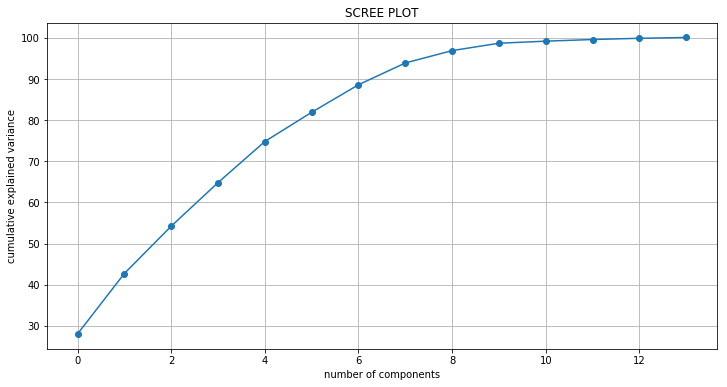

In [128]:
#SCREE PLOT
plt.figure(figsize=(12,6))
plt.plot(var_cum,'o-')
plt.title('SCREE PLOT')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [129]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(dat_admin)

In [130]:
principalDf = pd.DataFrame(data = principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],
                           index=data.index)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-7.921085,7.704087,-5.695026,-4.380476,0.407279,1.161948,-3.583814,-0.469946,3.534468,0.148543,-0.132176
1,-4.639404,-2.567980,-2.537908,3.994665,-1.217184,-0.523785,-0.341748,-1.142621,1.588051,-0.095675,-0.613210
2,-7.612534,5.545122,5.301250,-5.563085,2.949971,-0.191112,1.188964,-2.680651,3.015884,5.156461,-0.204906
3,-5.651187,1.685489,2.538751,-0.087332,-0.622242,-0.322345,1.026663,-2.004561,0.044558,0.659358,0.534263
4,-5.070178,1.609362,-0.927508,2.338272,-3.627862,-0.195971,0.969082,-1.798899,-1.513144,-0.136960,0.141480


In [131]:
Catego = sc_data[['Month','VisitorType','Weekend']]

In [132]:
Final = pd.concat([principalDf,Catego],axis=1)

In [133]:
X = Final
Y = data1.Revenue

## Logistic Regression

In [134]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [135]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [136]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.89  F1: 0.64 ROC-AOC: 0.78


In [137]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Quantile-N'],'Model':['Logistic Regression'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Decision Tree

In [138]:
DT = DecisionTreeClassifier()

In [139]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
GS.best_params_

{'max_depth': 1}

In [141]:
DT = DecisionTreeClassifier(max_depth=1)

###  K Fold Cross Validation

In [142]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [143]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    DT.fit(xtrain,ytrain)
    y_predict = DT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.66 ROC-AOC: 0.84


In [144]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Quantile-N'],'Model':['Decision Tree'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Random Forest

In [145]:
RT = RandomForestClassifier(random_state=0)

In [146]:
parameter ={'n_estimators':np.arange(1,10),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
GS.best_params_

{'max_depth': 3, 'n_estimators': 3}

In [148]:
RT = RandomForestClassifier(n_estimators=3,max_depth=3)

###  K Fold Cross Validation

In [149]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [150]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.87  F1: 0.31 ROC-AOC: 0.60


In [151]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Quantile-N'],'Model':['Random Forest'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


# QuantileTransformer-Uniform Scalar

In [152]:
qt_u = QuantileTransformer(output_distribution='uniform')
qtu_data = qt_u.fit_transform(data1)
qtu_data = pd.DataFrame(qtu_data,columns=data1.columns)

In [153]:
dat_admin = qtu_data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [154]:
pca = PCA()
principalComponents = pca.fit_transform(dat_admin)

In [155]:
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_cum

array([ 30.8,  43.9,  53.1,  61.7,  69.9,  77.3,  83.7,  89.6,  94.3,
        97.1,  98.7,  99.3,  99.7, 100. ])

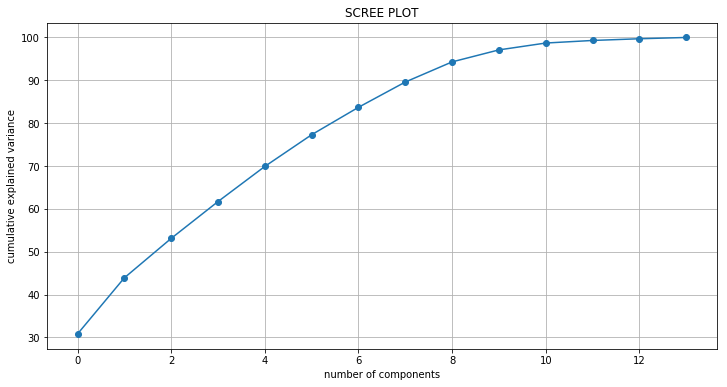

In [156]:
#SCREE PLOT
plt.figure(figsize=(12,6))
plt.plot(var_cum,'o-')
plt.title('SCREE PLOT')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [157]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(dat_admin)

In [158]:
principalDf = pd.DataFrame(data = principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'],
                           index=data.index)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.997965,0.504014,-0.201255,-0.686546,0.357655,0.495897,-0.281735,-0.367321,0.064943,0.044413,0.091112,0.006267
1,-0.822873,-0.106752,0.433959,-0.341628,0.069773,-0.199164,-0.114375,-0.339003,0.069615,-0.036656,-0.271368,-0.015288
2,-1.005943,0.446293,-0.402380,0.495172,0.334164,0.043146,0.166551,-0.282392,-0.221170,0.649061,0.047935,-0.010255
3,-0.946146,0.385560,-0.244388,0.113127,0.012748,-0.313469,0.159960,-0.296841,-0.226644,0.161127,0.064646,0.008347
4,-0.688556,0.304861,-0.110161,-0.152938,-0.476025,-0.479631,0.001282,-0.048422,-0.287023,-0.087957,-0.017110,0.132822


In [159]:
Catego = sc_data[['Month','VisitorType','Weekend']]

In [160]:
Final = pd.concat([principalDf,Catego],axis=1)

In [161]:
X = Final
Y = data1.Revenue

## Logistic Regression

In [162]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [163]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [164]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.89  F1: 0.64 ROC-AOC: 0.78


In [165]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Quantile-U'],'Model':['Logistic Regression'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Decision Tree

In [166]:
DT = DecisionTreeClassifier()

In [167]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
GS.best_params_

{'max_depth': 5}

In [169]:
DT = DecisionTreeClassifier(max_depth=5)

###  K Fold Cross Validation

In [170]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [171]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    DT.fit(xtrain,ytrain)
    y_predict = DT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.52 ROC-AOC: 0.70


In [172]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Quantile-U'],'Model':['Decision Tree'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Random Forest

In [173]:
RT = RandomForestClassifier(random_state=0)

In [174]:
parameter ={'n_estimators':np.arange(1,10),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [175]:
GS.best_params_

{'max_depth': 7, 'n_estimators': 9}

In [176]:
RT = RandomForestClassifier(n_estimators=9,max_depth=7)

###  K Fold Cross Validation

In [177]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [178]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.89  F1: 0.56 ROC-AOC: 0.71


In [179]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Quantile-U'],'Model':['Random Forest'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


# PowerTransformer Scalar

In [180]:
pt = PowerTransformer()
pt_data = pt.fit_transform(data1)
pt_data = pd.DataFrame(pt_data,columns=data1.columns)

In [181]:
dat_admin = pt_data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [182]:
pca = PCA()
principalComponents = pca.fit_transform(dat_admin)

In [183]:
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_cum

array([ 30.6,  42. ,  52.4,  60.5,  68.2,  75.2,  82.1,  87.9,  93.2,
        97.2,  98.8,  99.5,  99.9, 100.2])

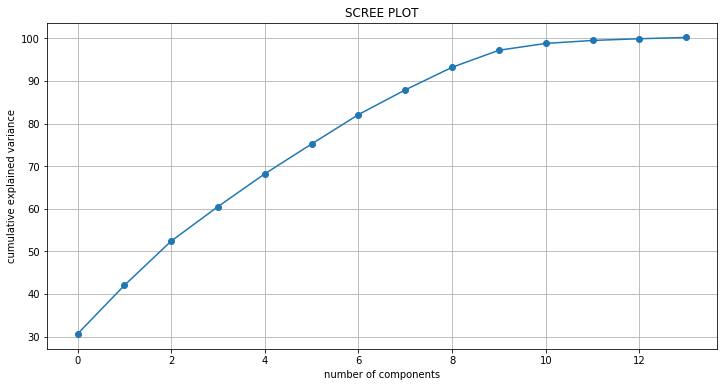

In [184]:
#SCREE PLOT
plt.figure(figsize=(12,6))
plt.plot(var_cum,'o-')
plt.title('SCREE PLOT')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [185]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(dat_admin)

In [186]:
principalDf = pd.DataFrame(data = principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'],
                           index=data.index)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.920140,1.991511,-2.355727,0.283991,-0.793543,-0.723568,-1.390815,-0.213432,0.325066,0.065675,-0.369966,-0.012273
1,-2.498042,-0.043940,-0.241032,-0.182367,-0.729320,-1.347235,0.261099,0.293493,0.734867,0.016066,1.282560,0.011888
2,-3.951751,1.397401,0.485310,1.791767,-0.455311,1.032274,0.095826,-0.823424,-0.469741,2.291366,-0.253220,-0.071019
3,-3.541975,0.997975,0.921738,1.036730,-0.064343,-0.685909,-0.036133,-0.636896,-0.136311,0.501397,-0.120717,-0.185376
4,-1.728243,-0.146968,1.375935,-0.552937,0.095767,-1.289438,-0.080415,-0.541112,-0.648556,-0.095550,0.062393,0.336985


In [187]:
Catego = sc_data[['Month','VisitorType','Weekend']]

In [188]:
Final = pd.concat([principalDf,Catego],axis=1)

In [189]:
X = Final
Y = data1.Revenue

## Logistic Regression

In [190]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [191]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [192]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.89  F1: 0.64 ROC-AOC: 0.78


In [193]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Power Transform'],'Model':['Logistic Regression'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Decision Tree

In [194]:
DT = DecisionTreeClassifier()

In [195]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [196]:
GS.best_params_

{'max_depth': 3}

In [197]:
DT = DecisionTreeClassifier(max_depth=3)

###  K Fold Cross Validation

In [198]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [199]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    DT.fit(xtrain,ytrain)
    y_predict = DT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.59 ROC-AOC: 0.76


In [200]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Power Transform'],'Model':['Decision Tree'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Random Forest

In [201]:
RT = RandomForestClassifier(random_state=0)

In [202]:
parameter ={'n_estimators':np.arange(1,10),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [203]:
GS.best_params_

{'max_depth': 4, 'n_estimators': 8}

In [204]:
RT = RandomForestClassifier(n_estimators=8,max_depth=4)

###  K Fold Cross Validation

In [205]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [206]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.44 ROC-AOC: 0.65


In [207]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Power Transform'],'Model':['Random Forest'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


# Normalizer

In [208]:
nm = Normalizer()
nm_data = nm.fit_transform(data1)
nm_data = pd.DataFrame(nm_data,columns=data1.columns)

In [209]:
dat_admin = nm_data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]

In [210]:
pca = PCA()
principalComponents = pca.fit_transform(dat_admin)

In [211]:
var_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var_cum

array([58.3, 83.4, 90. , 94. , 96. , 97.5, 98.6, 99.4, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9])

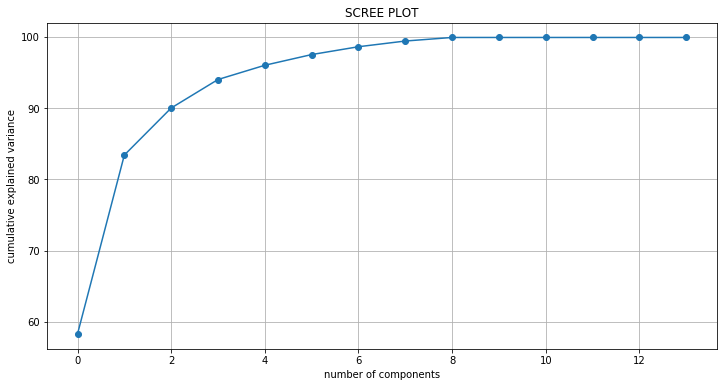

In [212]:
#SCREE PLOT
plt.figure(figsize=(12,6))
plt.plot(var_cum,'o-')
plt.title('SCREE PLOT')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [213]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(dat_admin)

In [214]:
principalDf = pd.DataFrame(data = principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'],
                           index=data.index)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.991455,-0.294753,-0.009944,-0.122483,-0.114764,-0.047728,0.005368,0.105284
1,-0.113610,-0.088322,-0.018833,0.000357,-0.009419,-0.011582,-0.006899,-0.018035
2,1.092902,-0.362548,-0.046171,-0.337936,0.399704,0.089899,-0.008687,-0.002627
3,0.781846,-0.362747,-0.118371,0.132441,0.044686,-0.277306,0.076743,0.033072
4,-0.137708,-0.072612,-0.008762,-0.003766,-0.014528,0.023948,-0.017136,-0.012197


In [215]:
Catego = sc_data[['Month','VisitorType','Weekend']]

In [216]:
Final = pd.concat([principalDf,Catego],axis=1)

In [217]:
X = Final
Y = data1.Revenue

## Logistic Regression

In [218]:
LR = LogisticRegression()

###  K Fold Cross Validation

In [219]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [220]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    LR.fit(xtrain,ytrain)
    y_predict = LR.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.86  F1: 0.22 ROC-AOC: 0.56


In [221]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Normalizer'],'Model':['Logistic Regression'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Decision Tree

In [222]:
DT = DecisionTreeClassifier()

In [223]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [224]:
GS.best_params_

{'max_depth': 2}

In [225]:
DT = DecisionTreeClassifier(max_depth=2)

###  K Fold Cross Validation

In [226]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [227]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    DT.fit(xtrain,ytrain)
    y_predict = DT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.87  F1: 0.38 ROC-AOC: 0.62


In [228]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Normalizer'],'Model':['Decision Tree'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
0,Standard,Decision Tree,0.871046,0.326190,0.597803
0,Standard,Random Forest,0.875426,0.372520,0.615600
0,MinMax,Logistic Regression,0.846796,0.046464,0.510790
0,MinMax,Decision Tree,0.854015,0.217509,0.560389
0,MinMax,Random Forest,0.853609,0.116509,0.530452
0,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
0,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
0,MaxAbs,Random Forest,0.885483,0.574297,0.728319
0,Robust,Logistic Regression,0.883617,0.491802,0.671506


## Random Forest

In [229]:
RT = RandomForestClassifier(random_state=0)

In [230]:
parameter ={'n_estimators':np.arange(1,10),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [231]:
GS.best_params_

{'max_depth': 6, 'n_estimators': 6}

In [232]:
RT = RandomForestClassifier(n_estimators=6,max_depth=6)

###  K Fold Cross Validation

In [233]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [234]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict))
    fpr,tpr,_=metrics.roc_curve(ytest,y_predict)
    roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f ROC-AOC: %0.02F'
      %(np.mean(accuracy),np.mean(F1),np.mean(roc_auc)))

 Accuracy: 0.88  F1: 0.48 ROC-AOC: 0.66


In [235]:
# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Scaling':['Normalizer'],'Model':['Random Forest'], 
                          'Accuracy': [np.mean(accuracy)], 'F1 Score': [np.mean(F1)],'ROC-AUC':[np.mean(roc_auc)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Scaling','Model', 'Accuracy','F1 Score','ROC-AUC']]
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

,Scaling,Model,Accuracy,F1 Score,ROC-AUC
0,Standard,Logistic Regression,0.884266,0.501025,0.676718
1,Standard,Decision Tree,0.871046,0.326190,0.597803
2,Standard,Random Forest,0.875426,0.372520,0.615600
3,MinMax,Logistic Regression,0.846796,0.046464,0.510790
4,MinMax,Decision Tree,0.854015,0.217509,0.560389
5,MinMax,Random Forest,0.853609,0.116509,0.530452
6,MinAbs,Logistic Regression,0.875101,0.404829,0.630048
7,MaxAbs,Decision Tree,0.879724,0.442958,0.647131
8,MaxAbs,Random Forest,0.885483,0.574297,0.728319
9,Robust,Logistic Regression,0.883617,0.491802,0.671506


In [236]:
resultsDf['Accuracy'] = np.round(resultsDf['Accuracy'],2)
resultsDf['F1 Score'] = np.round(resultsDf['F1 Score'],2)
resultsDf['ROC-AUC'] = np.round(resultsDf['ROC-AUC'],2)

In [237]:
resultsDf.max()

Scaling          Standard
Model       Random Forest
Accuracy             0.89
F1 Score             0.66
ROC-AUC              0.84
dtype: object

# Inference:
    From all the scaling methods Standard scaling has provided us the best scores
    From all the model scores of Random Forest is par 80 for all the metrics.
    It provided us a good Auc as well only .16 percent has chances of misclassification.
    Applying PCA doesnt make any big impact in the models.